In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.io import loadmat

In [3]:
data = loadmat('data/ex8data1.mat')
X = data['X']
X.shape

(307, 2)

In [5]:
df = pd.DataFrame(X)
df.describe()

,0,1
count,307.000000,307.000000
mean,14.112226,14.997711
std,1.355957,1.309707
min,4.752613,4.126232
25%,13.403351,14.361997
50%,14.059507,15.023113
75%,14.675503,15.654394
max,23.339868,24.350407


In [6]:
df.head()

,0,1
0,13.046815,14.741152
1,13.408520,13.763270
2,14.195915,15.853181
3,14.914701,16.174260
4,13.576700,14.042849


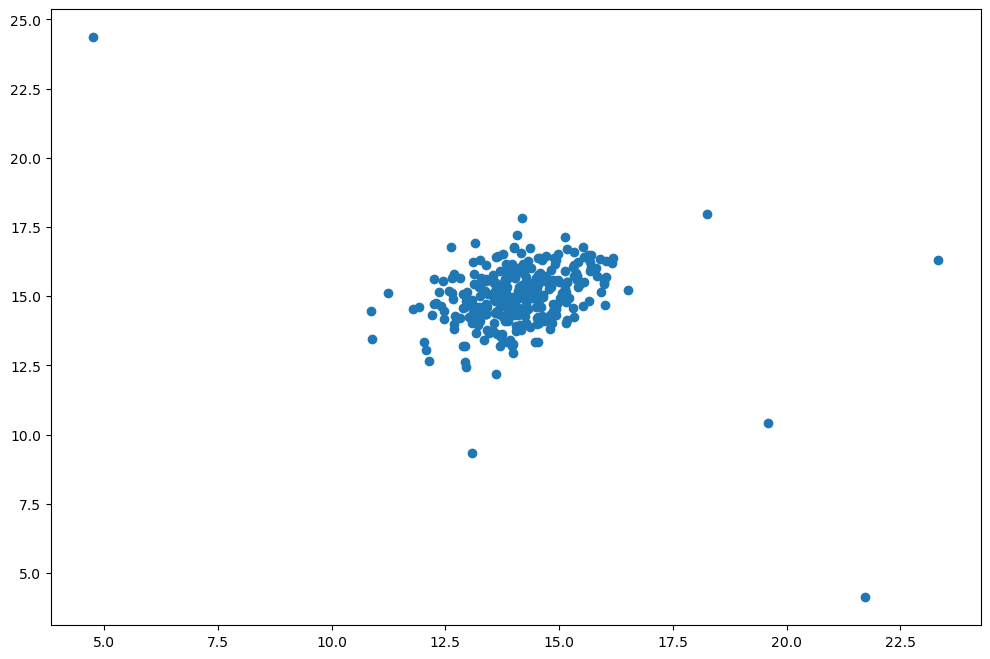

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(X[:,0], X[:,1])
plt.show()

In [7]:
def estimate_gaussian(X):
    mu = X.mean(axis=0)
    sigma = X.var(axis=0)
    
    return mu, sigma

In [8]:
mu, sigma = estimate_gaussian(X)
mu, sigma

(array([14.11222578, 14.99771051]), array([1.83263141, 1.70974533]))

In [9]:
from scipy.stats import norm

# Calculate the probability density for each data point in X
p = norm.pdf(X, mu, sigma)

# Print the probability density values
print(p)

[[1.83841999e-01 2.30722079e-01]
 [2.02216942e-01 1.79796975e-01]
 [2.17461362e-01 2.05880806e-01]
 [1.97787629e-01 1.84141022e-01]
 [2.08589556e-01 1.99641158e-01]
 [2.16523592e-01 1.51317623e-01]
 [1.69912906e-01 2.10580011e-01]
 [1.51235416e-01 2.03521950e-01]
 [1.16398899e-01 1.81997690e-01]
 [1.59473402e-01 2.32946434e-01]
 [2.17160574e-01 1.14533171e-01]
 [2.17604722e-01 2.25438592e-01]
 [2.01418569e-01 2.20964927e-01]
 [2.01574972e-01 2.18053554e-01]
 [2.17113848e-01 1.40916012e-01]
 [2.17587750e-01 2.22312953e-01]
 [2.16955755e-01 2.30933779e-01]
 [2.13825801e-01 2.33124789e-01]
 [2.10570692e-01 2.07414399e-01]
 [1.17301796e-01 1.23341335e-01]
 [2.07651082e-01 2.21958695e-01]
 [2.17174521e-01 2.31581777e-01]
 [1.95106630e-01 1.57115899e-01]
 [2.17021517e-01 2.29850514e-01]
 [1.74293986e-01 1.87772066e-01]
 [1.54134548e-01 1.59347573e-01]
 [2.10001092e-01 2.24977687e-01]
 [2.02235856e-01 2.28716523e-01]
 [2.10318981e-01 2.27483100e-01]
 [2.13134257e-01 2.17395562e-01]
 [1.615894

In [10]:
p.shape

(307, 2)

In [13]:
Xval = data['Xval']
yval = data['yval']

Xval.shape, yval.shape

((307, 2), (307, 1))

In [14]:
pval = norm.pdf(Xval, mu, sigma)

In [15]:
pval.shape

(307, 2)

In [16]:
def calculate_f1_score(tp, fp, fn):
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1_score = 2 * (precision * recall) / (precision + recall)
    return f1_score

In [17]:
def select_threshold(pval, yval):
    best_epsilon = 0
    best_f1 = 0
    
    step = (pval.max() - pval.min()) / 1000
    
    for epsilon in np.arange(pval.min(), pval.max(), step):
        preds = pval < epsilon
        
        tp = np.sum(np.logical_and(preds == 1, yval == 1)).astype(float)
        fp = np.sum(np.logical_and(preds == 1, yval == 0)).astype(float)
        fn = np.sum(np.logical_and(preds == 0, yval == 1)).astype(float)
        f1 = calculate_f1_score(tp, fp, fn)
      
        if f1 > best_f1:
            best_f1 = f1
            best_epsilon = epsilon
    
    return best_epsilon, best_f1

In [18]:
epsilon, f1 = select_threshold(pval, yval)
epsilon, f1

C:\Users\20232\AppData\Local\Temp\ipykernel_13740\1948599754.py:2: RuntimeWarning: invalid value encountered in scalar divide
  precision = tp / (tp + fp)


(0.009566706005956842, 0.7142857142857143)

In [19]:
# indexes of the values considered to be outliers
outliers = np.where(p < epsilon)
outliers

(array([300, 301, 301, 303, 303, 304, 306, 306], dtype=int64),
 array([1, 0, 1, 0, 1, 0, 0, 1], dtype=int64))

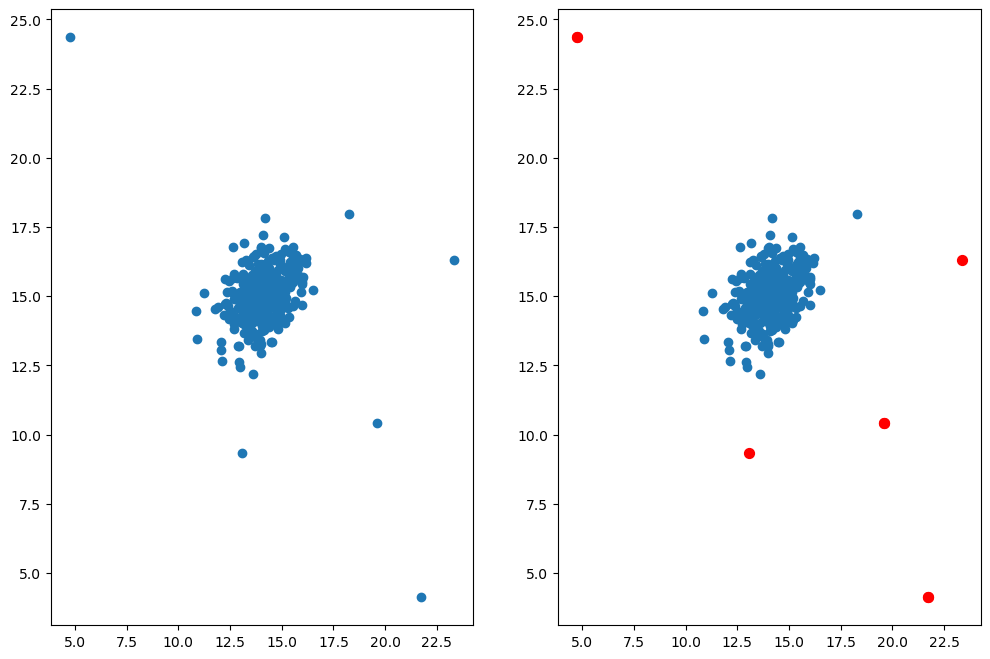

In [20]:
fig, axs = plt.subplots(1,2, figsize=(12,8))
axs[0].scatter(X[:,0], X[:,1])
axs[1].scatter(X[:,0], X[:,1])
axs[1].scatter(X[outliers[0],0], X[outliers[0],1], s=50, color='r', marker='o')
plt.show()